In [25]:
# Group 5
# Neel Gandhi, Sunishka Jain, Daniel Shen, Julian Wu
#This is just to get a sense of the distributions of the data

# Imports
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Import data

file = './processedData.csv'
data = pd.read_csv(file)

In [27]:
import numpy as np

from scipy.stats import uniform, randint
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import xgboost as xgb

In [28]:
convert_feature = ['cDNA_position','CDS_position','Protein_position']
data['cDNA_position'] = data['cDNA_position'].astype(str).str.replace(r'\D+', '')
data['CDS_position'] = data['CDS_position'].astype(str).str.replace(r'\D+', '')
data['Protein_position'] = data['Protein_position'].astype(str).str.replace(r'\D+', '')
for i in range(len(convert_feature)):
    data[convert_feature[i]] = data[convert_feature[i]].astype(int)

In [43]:
#Dropping the first column because it does not represent meaningful data
data = data.iloc[: , 1:]

<ipython-input-44-1db85565c39d>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
/Users/danielshen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/danielshen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/danielshen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/danielshen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:

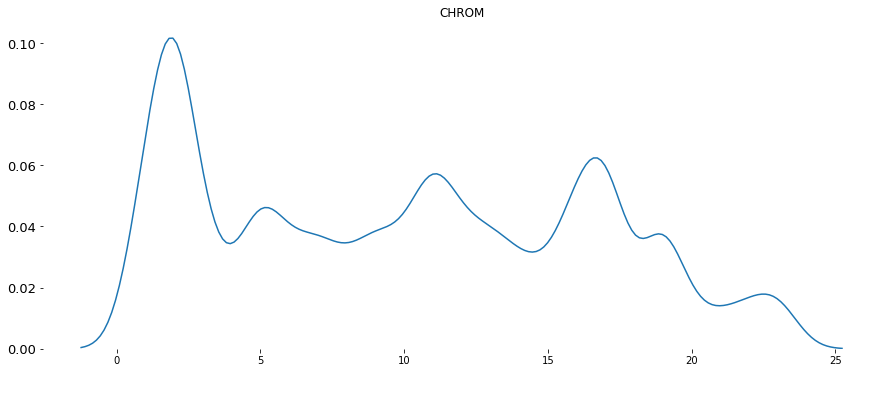

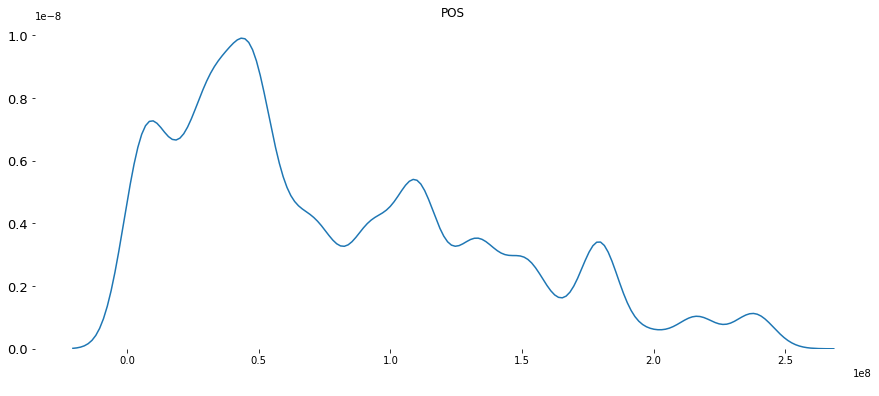

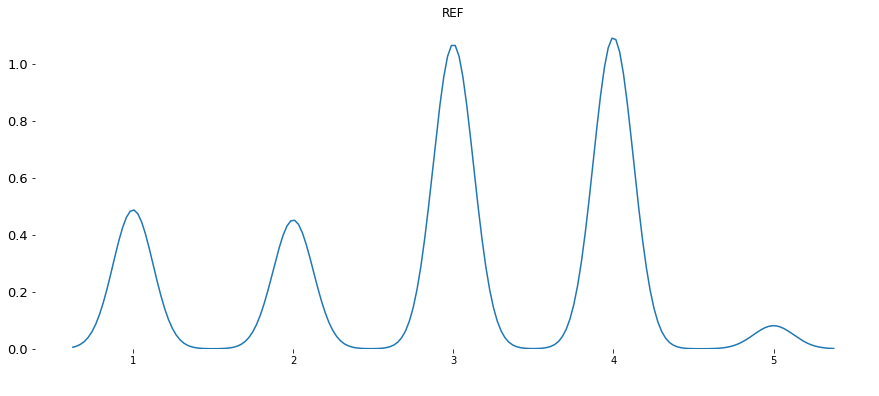

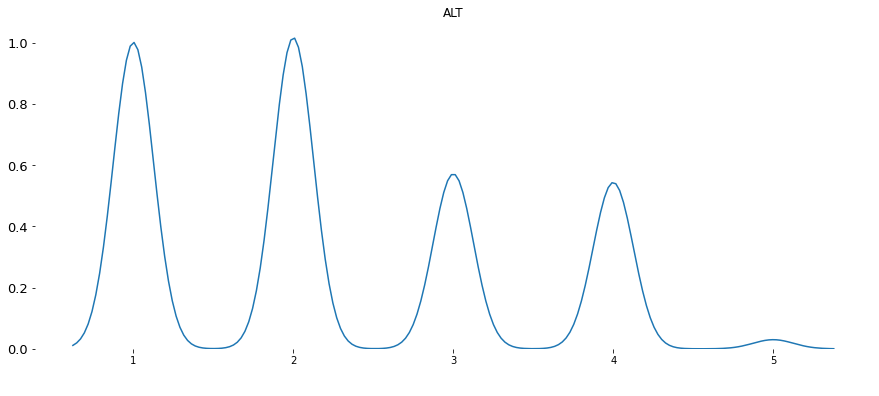

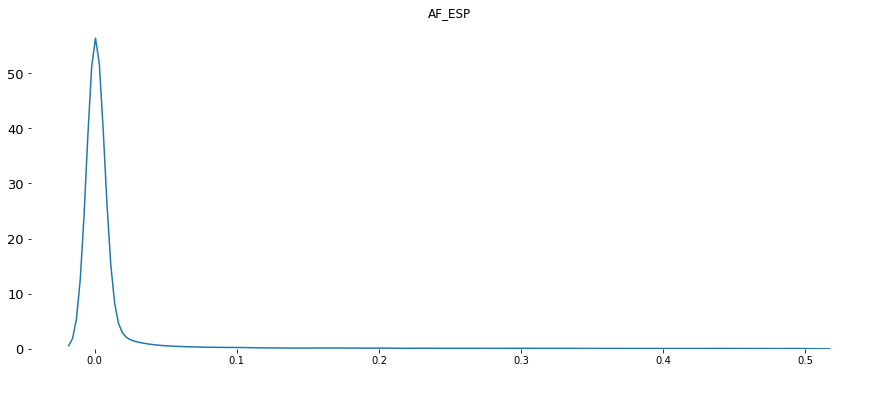

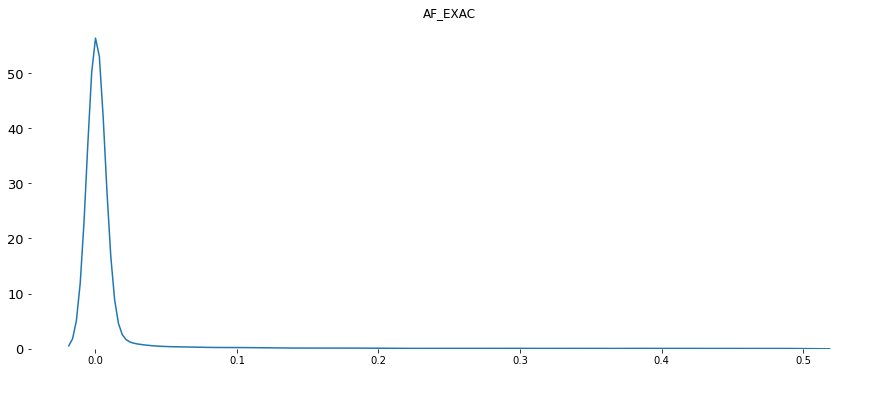

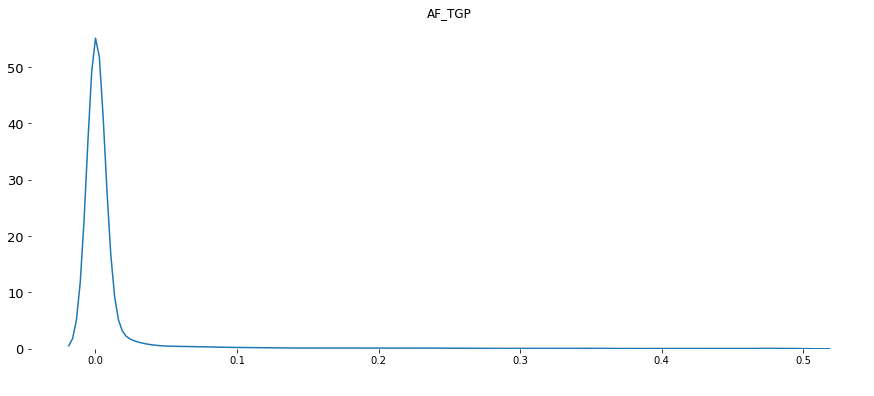

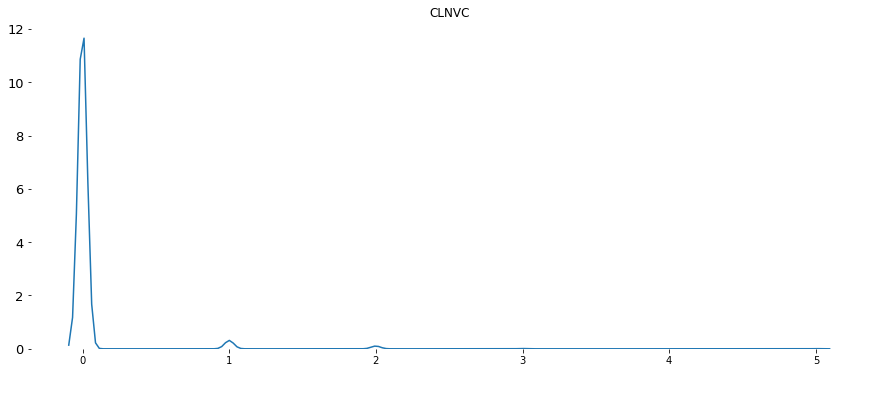

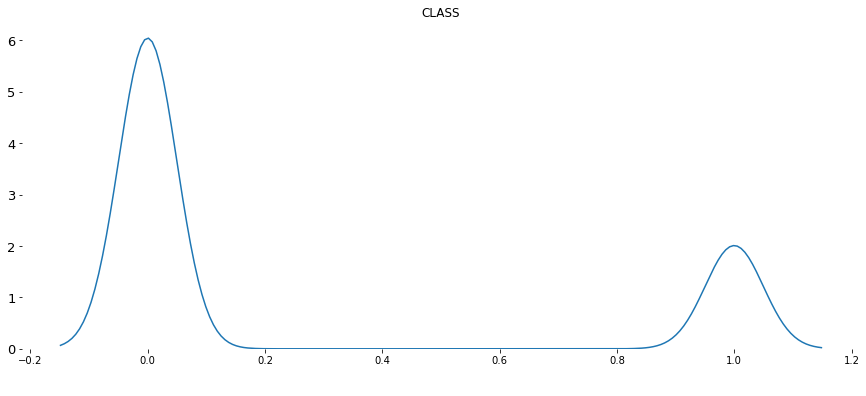

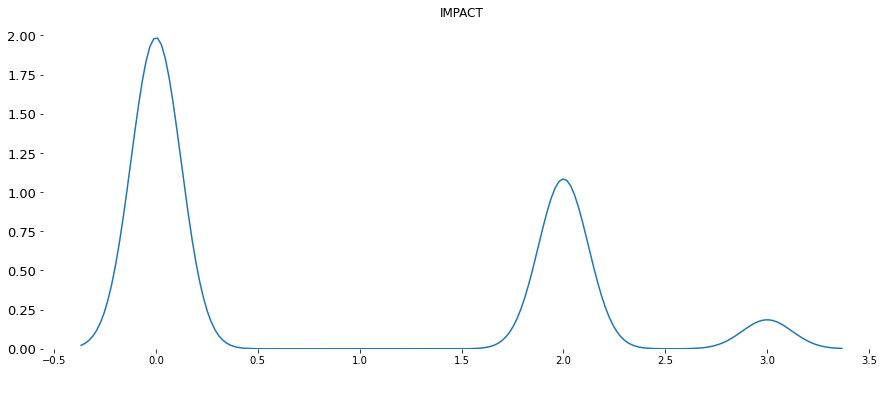

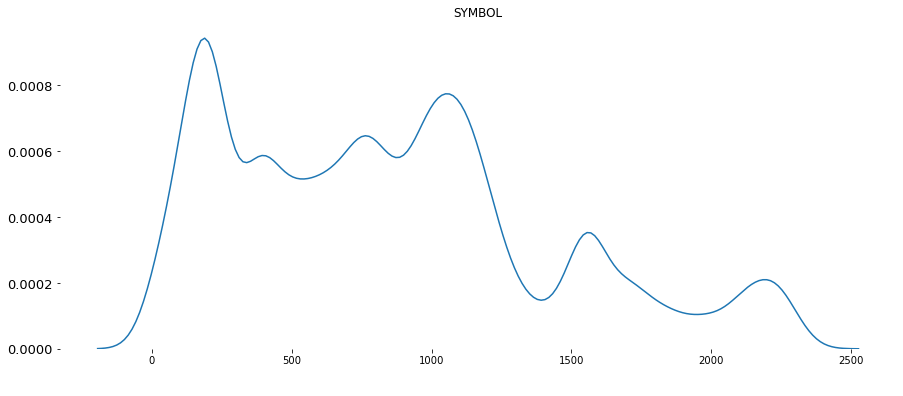

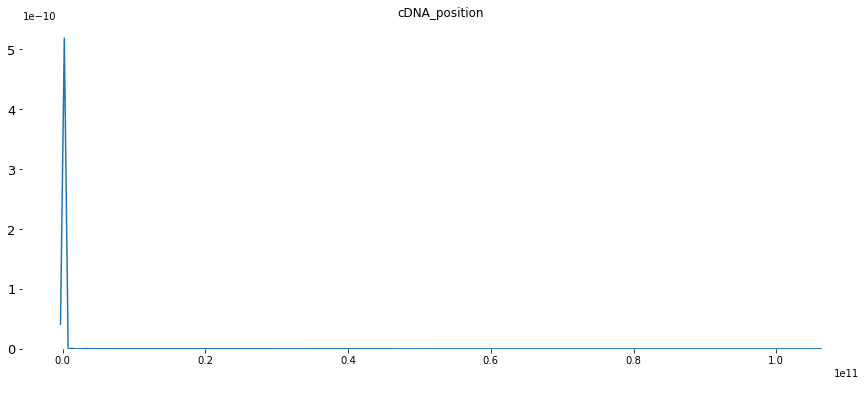

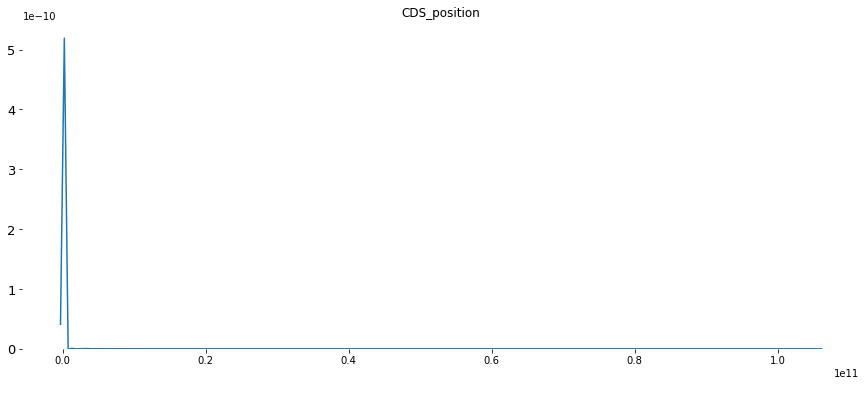

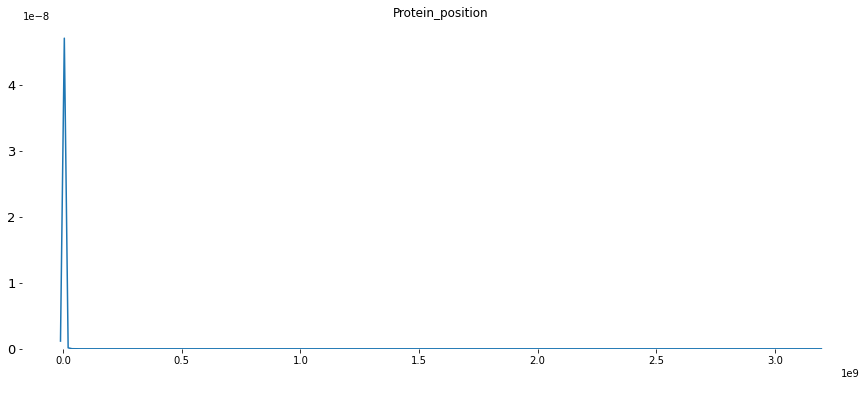

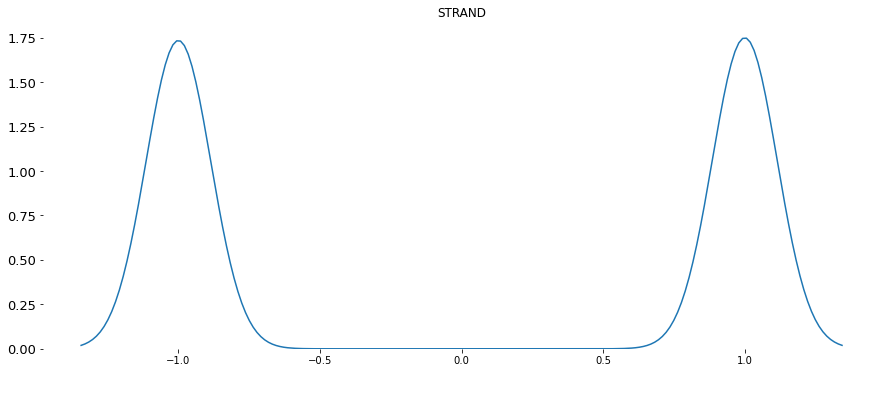

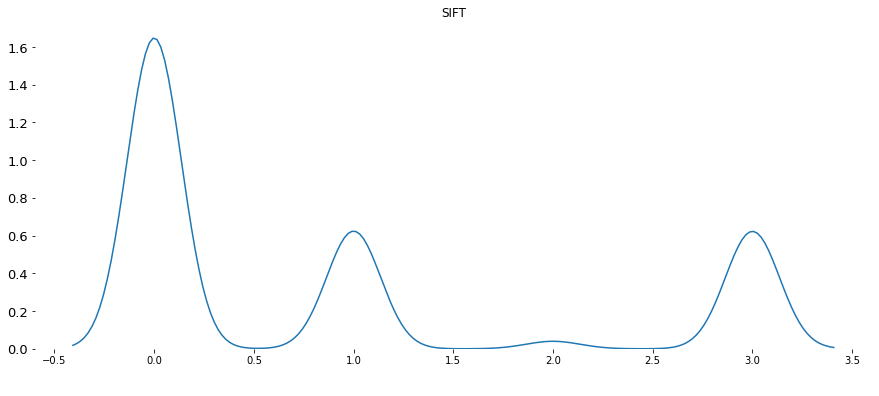

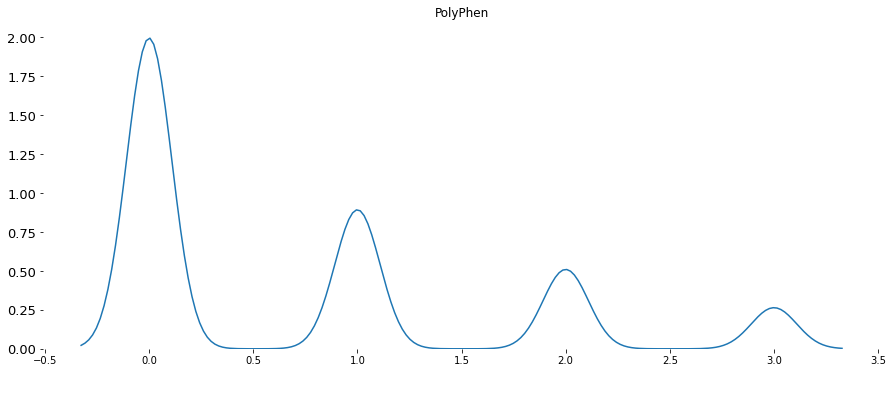

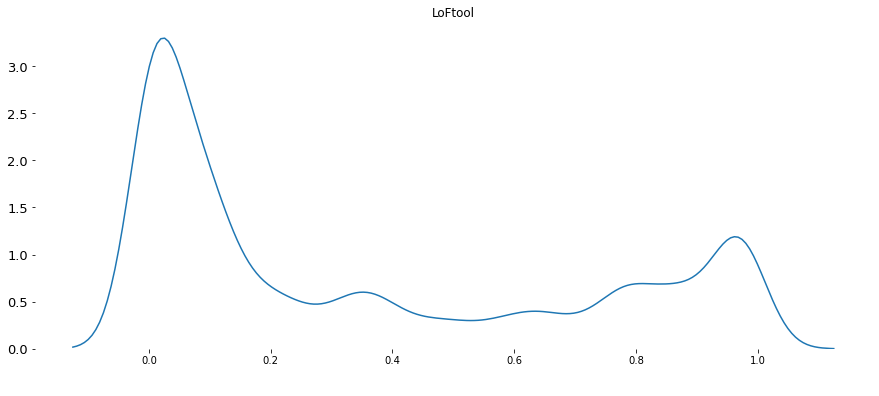

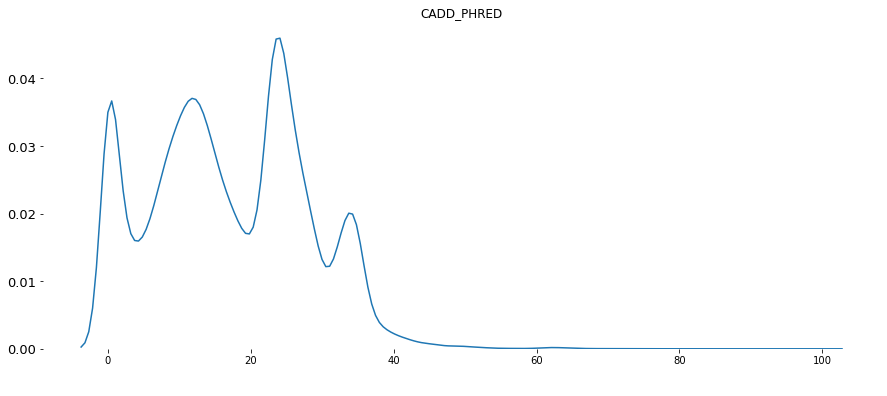

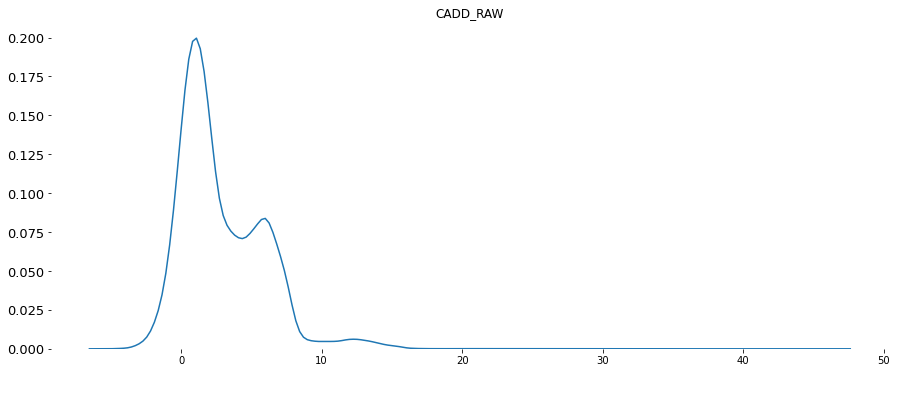

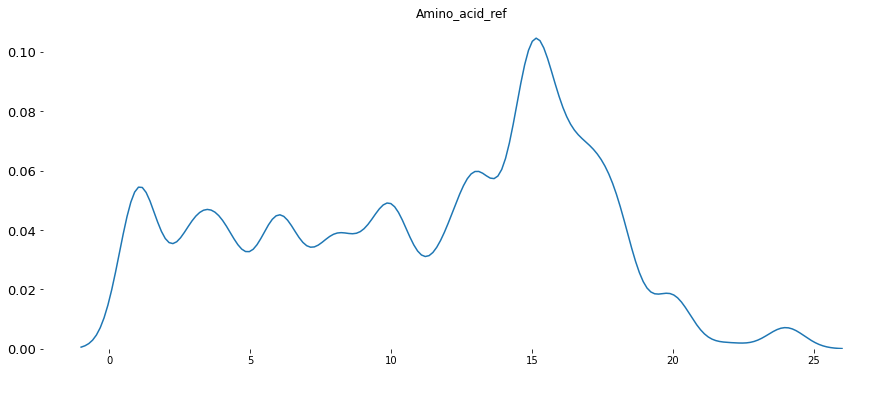

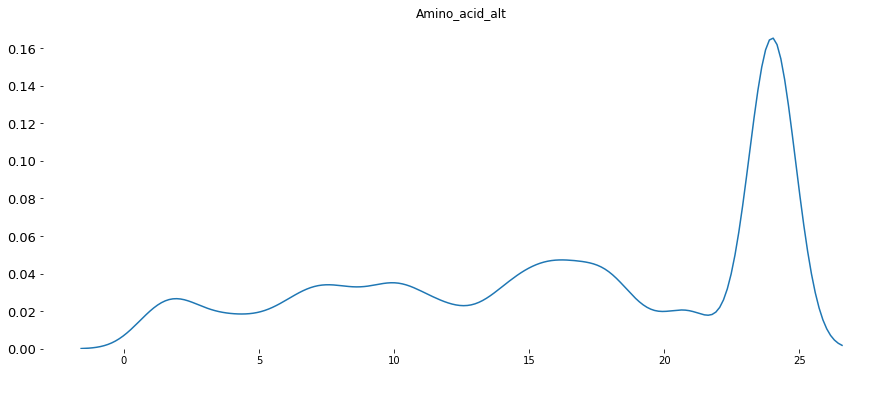

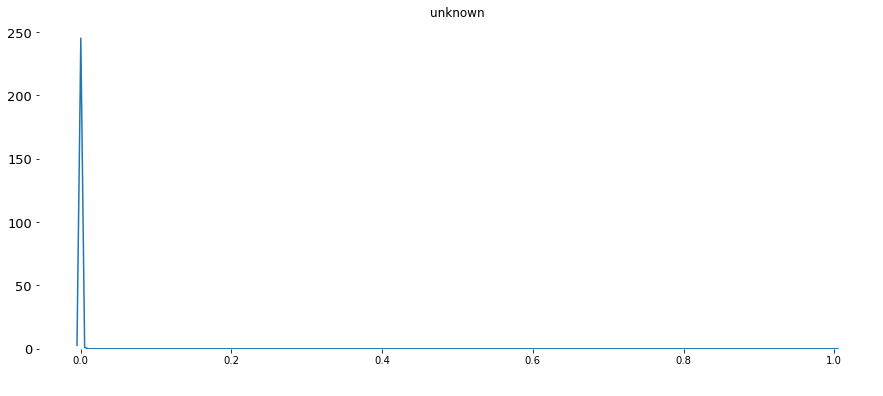

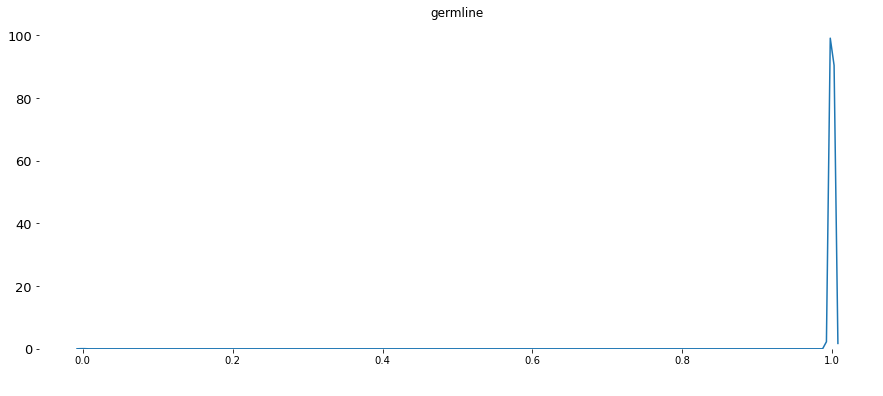

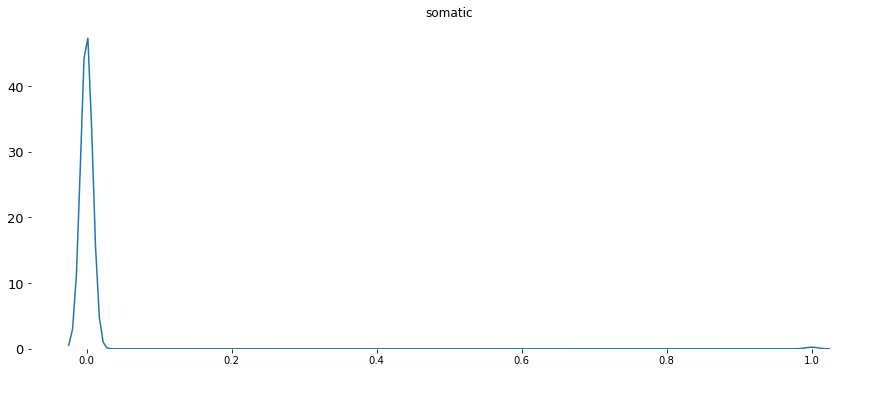

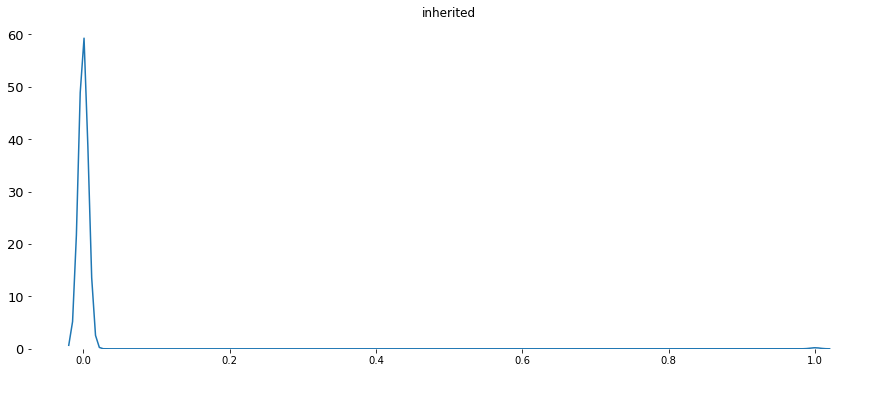

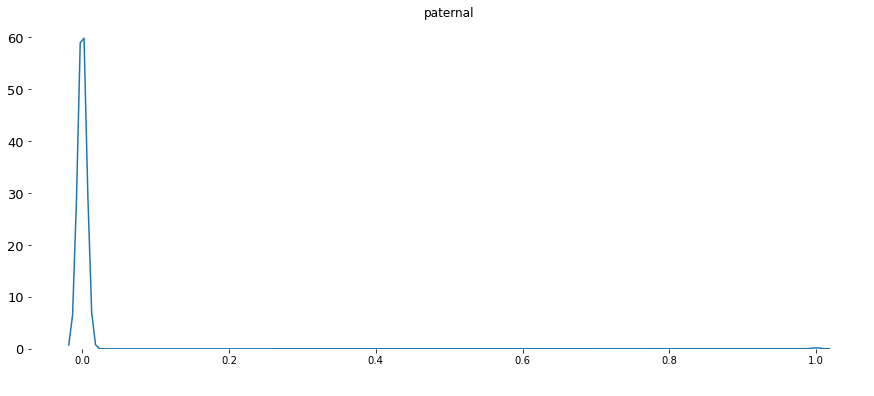

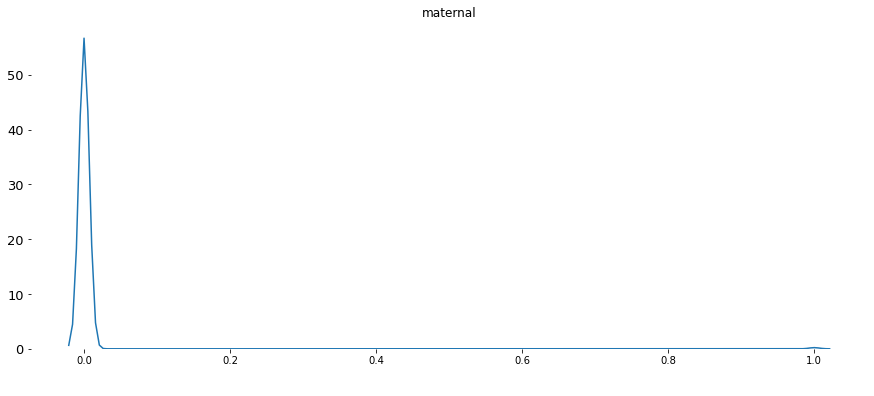

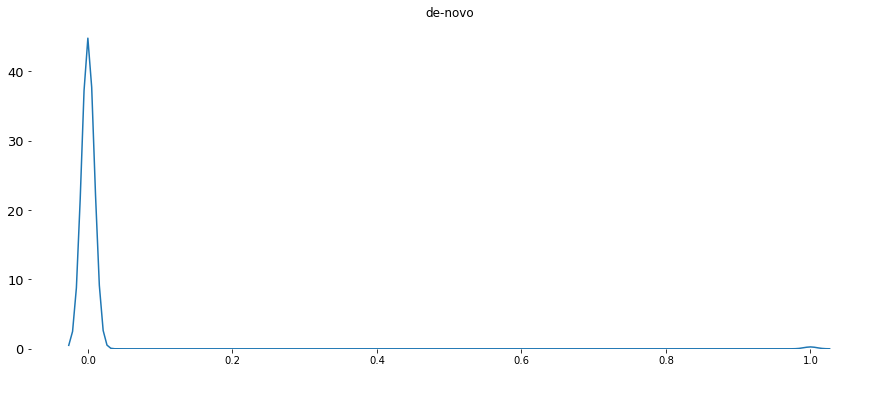

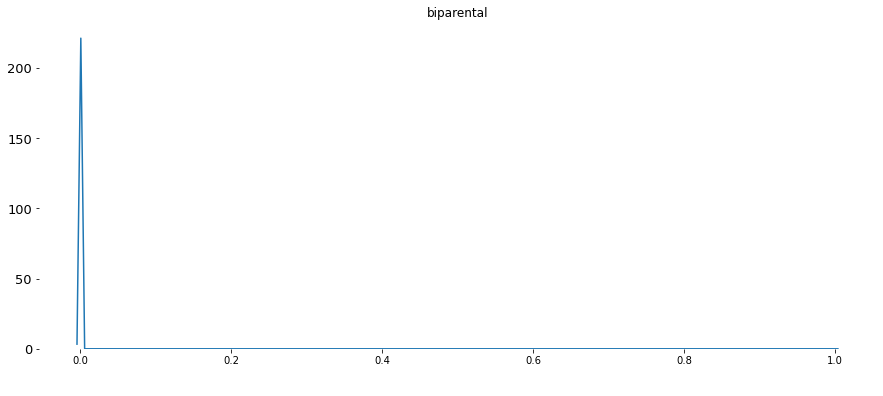

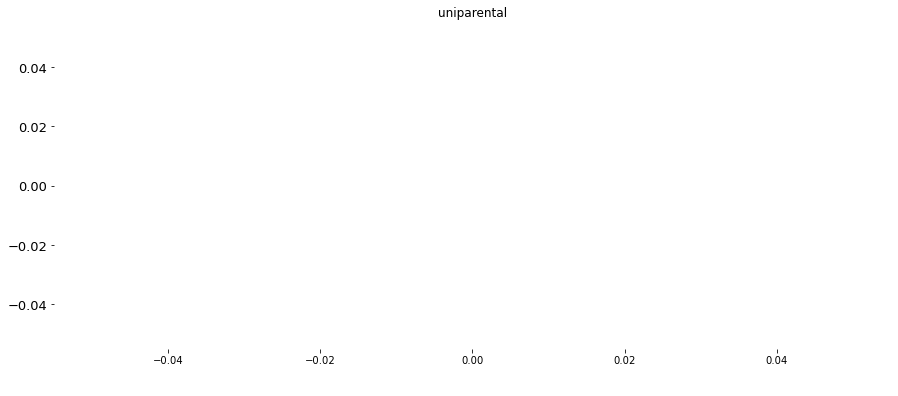

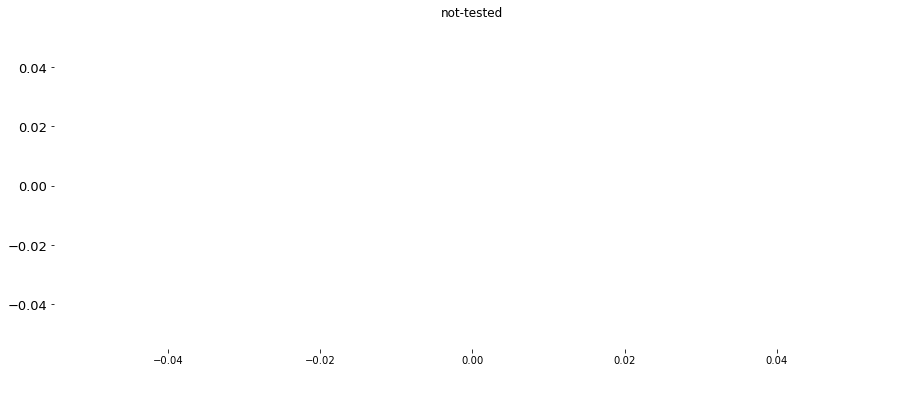

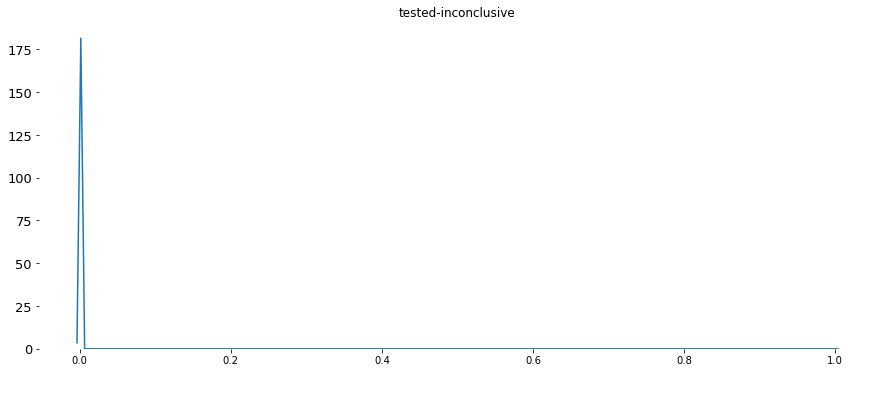

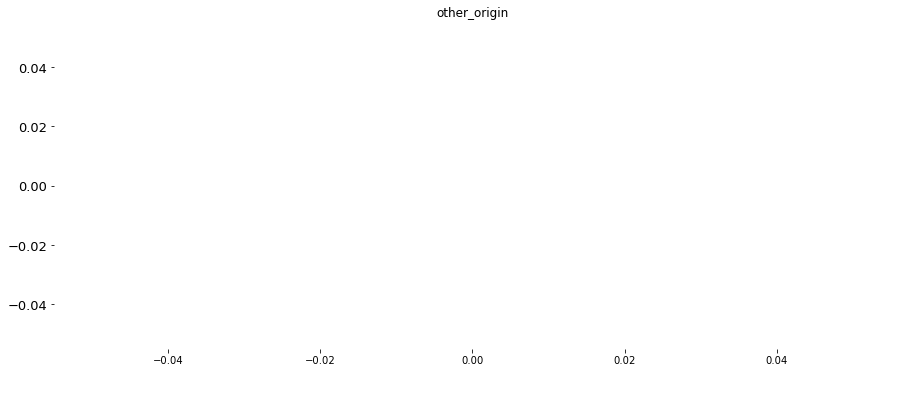

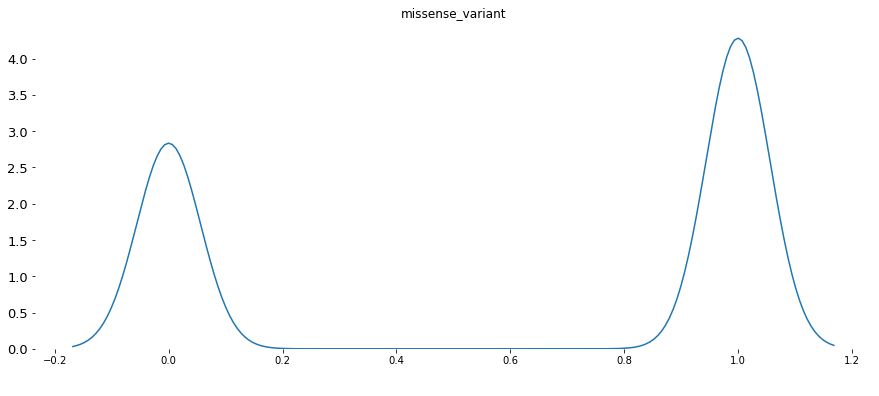

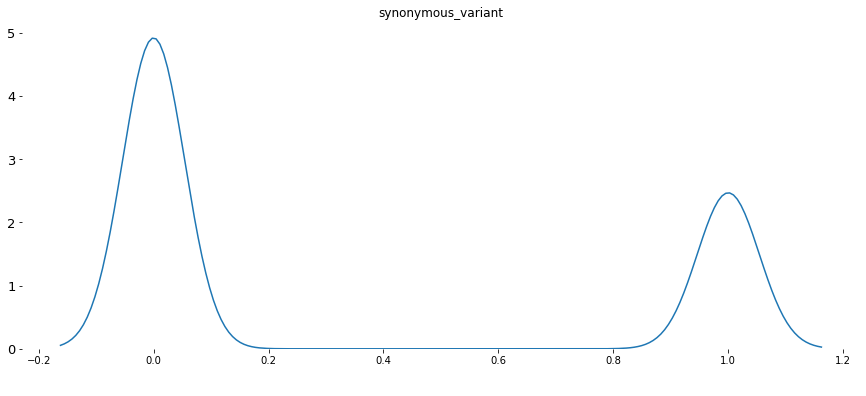

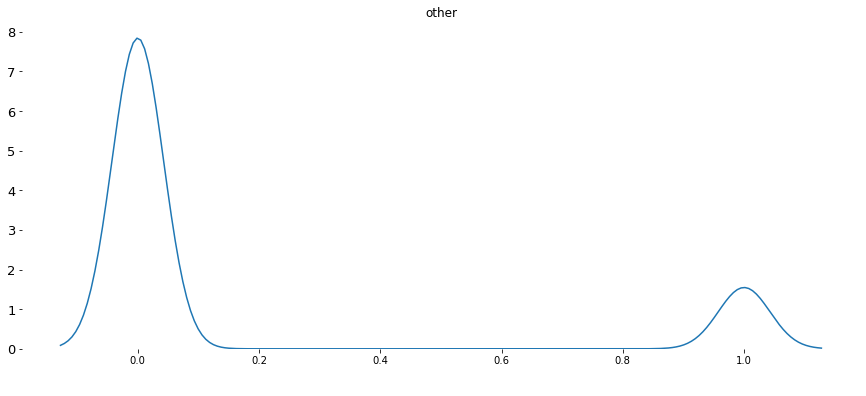

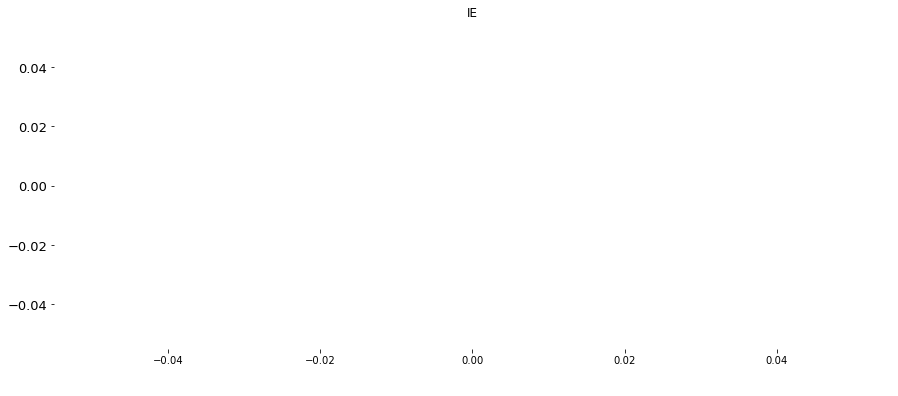

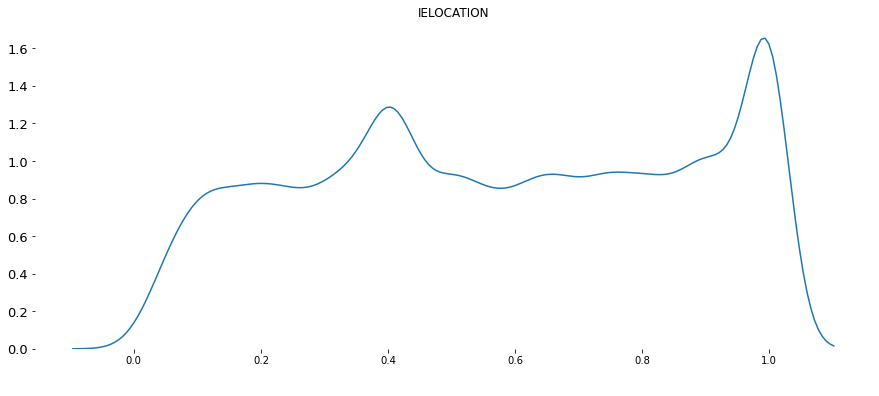

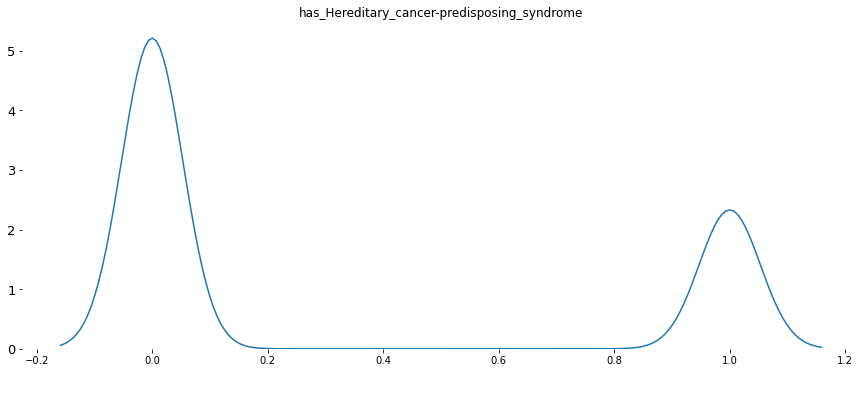

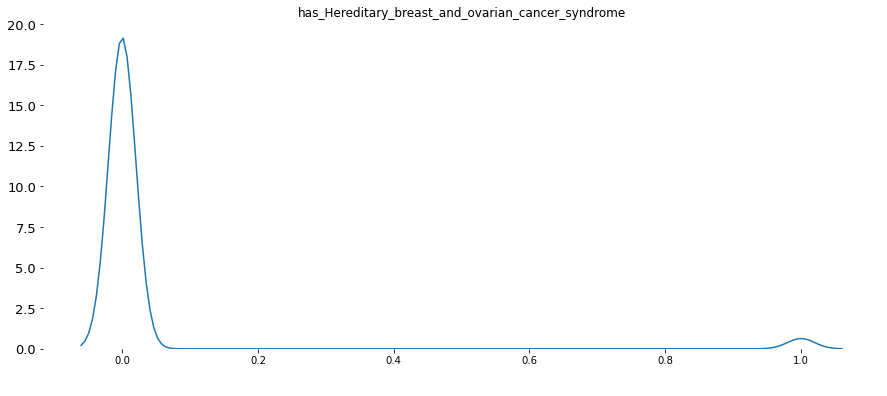

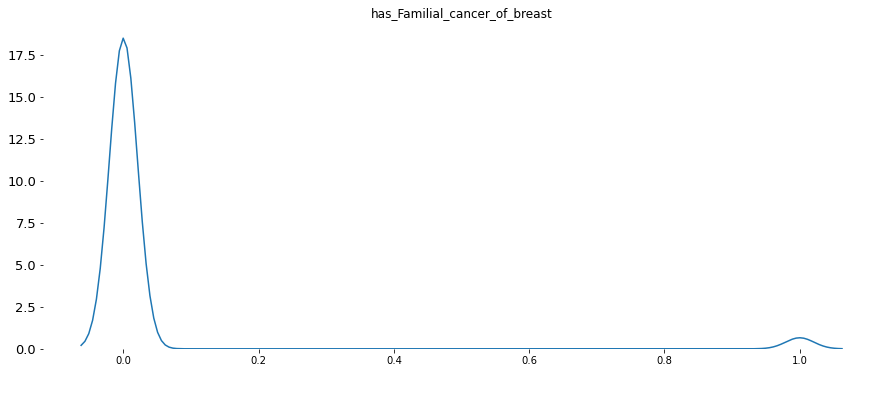

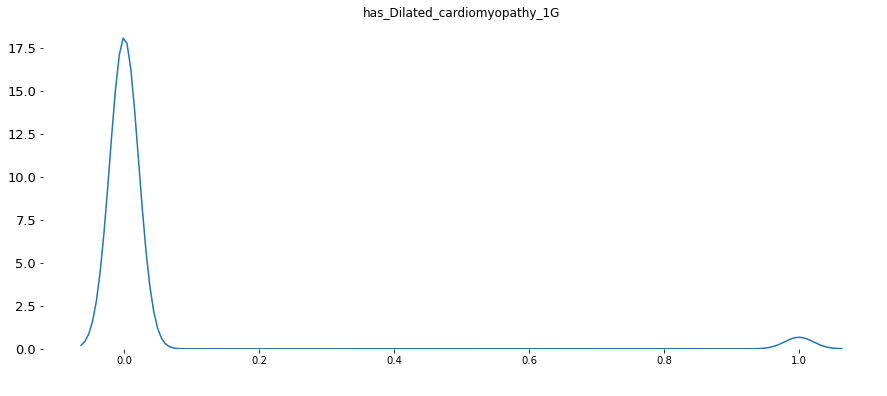

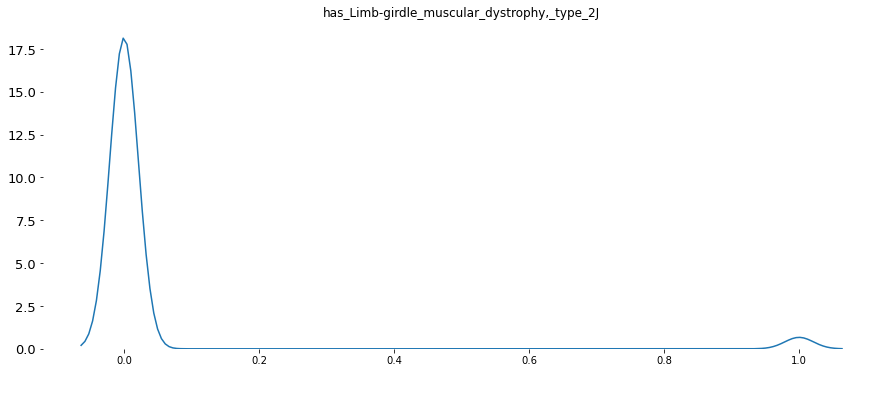

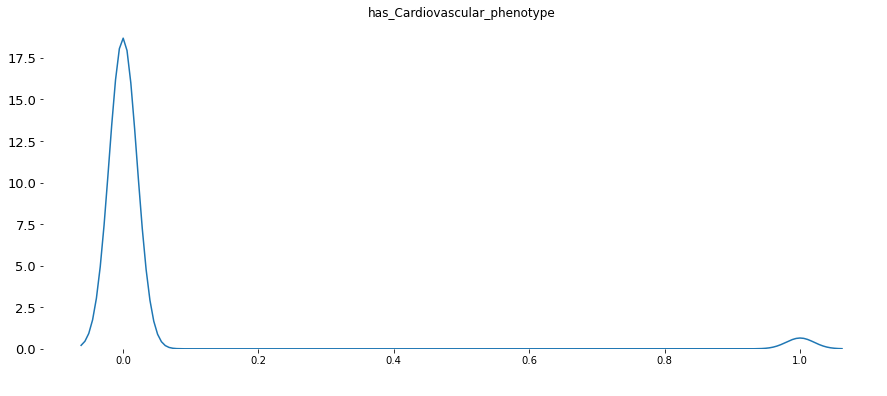

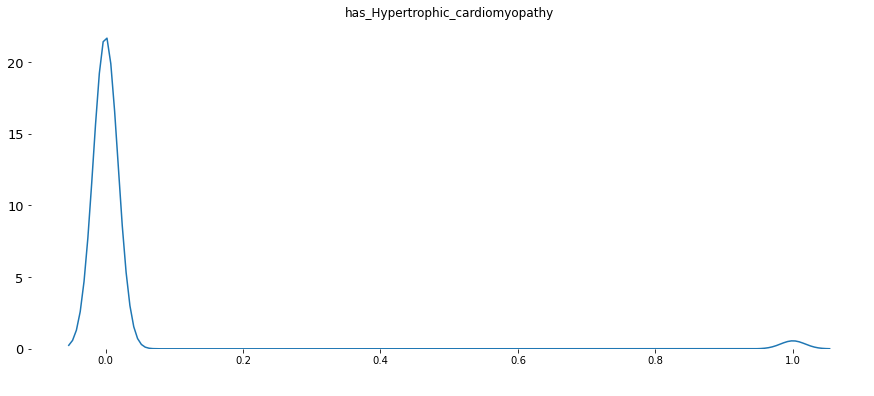

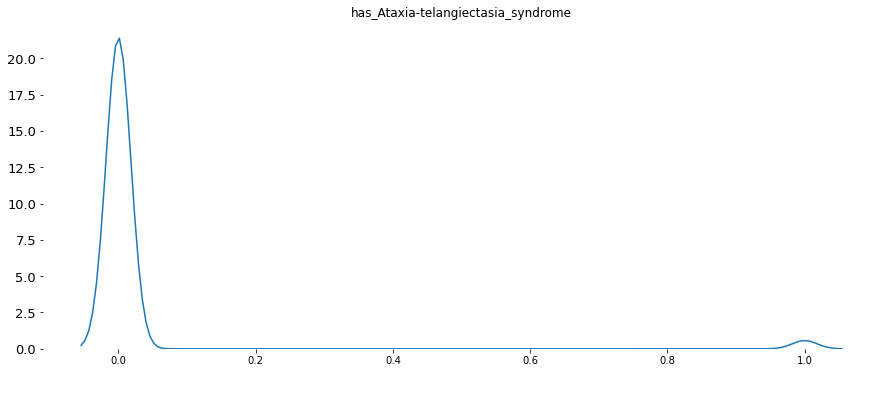

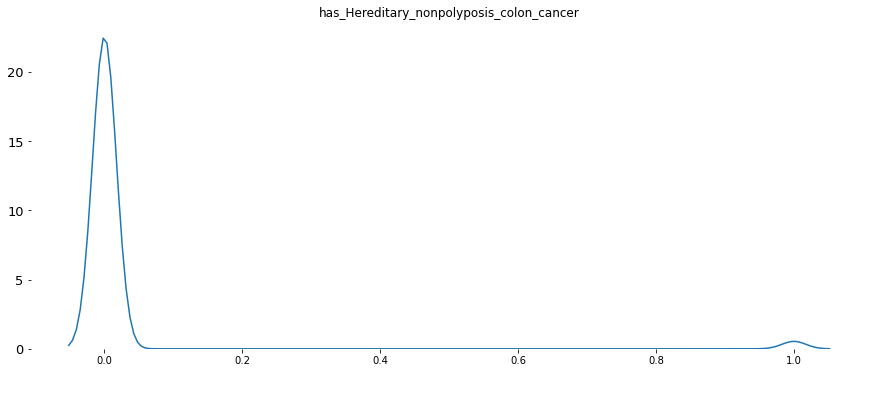

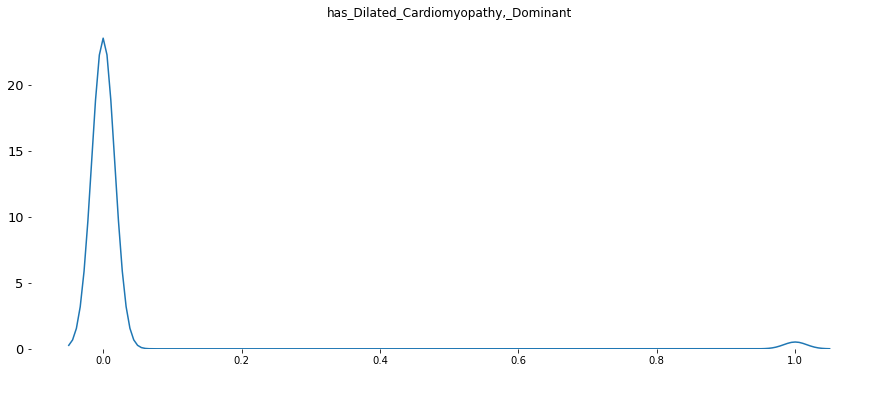

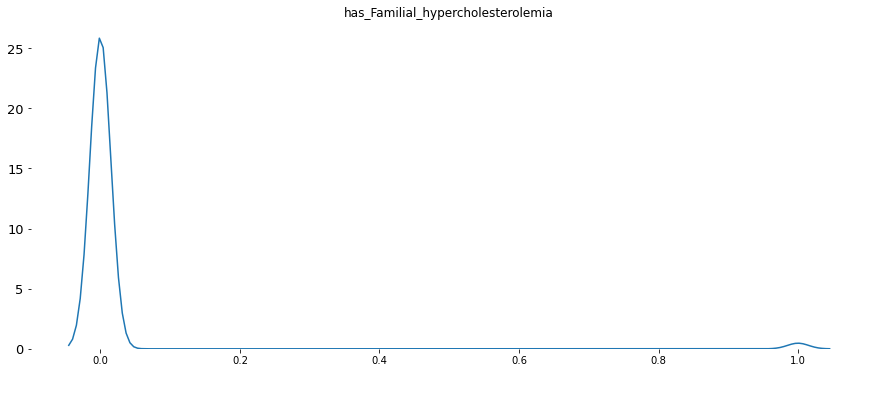

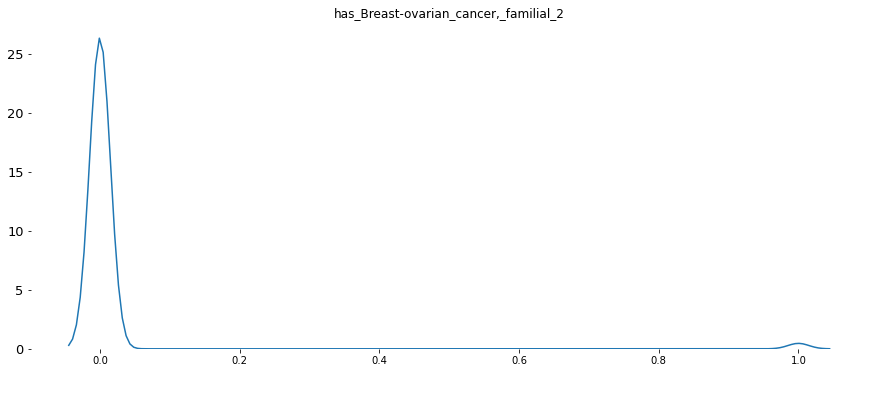

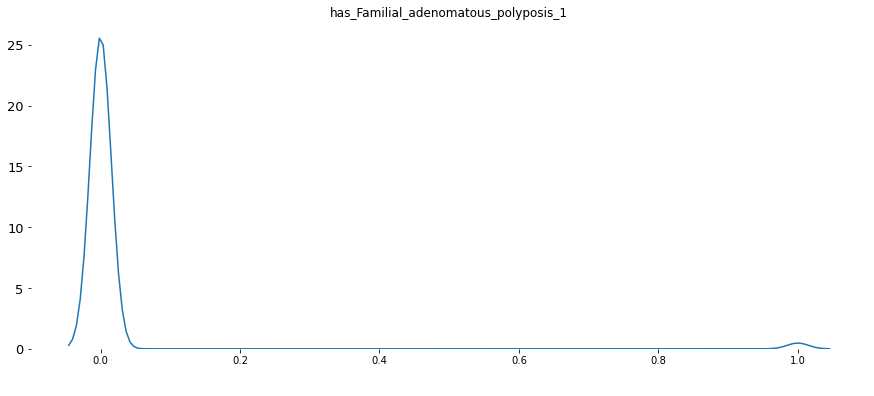

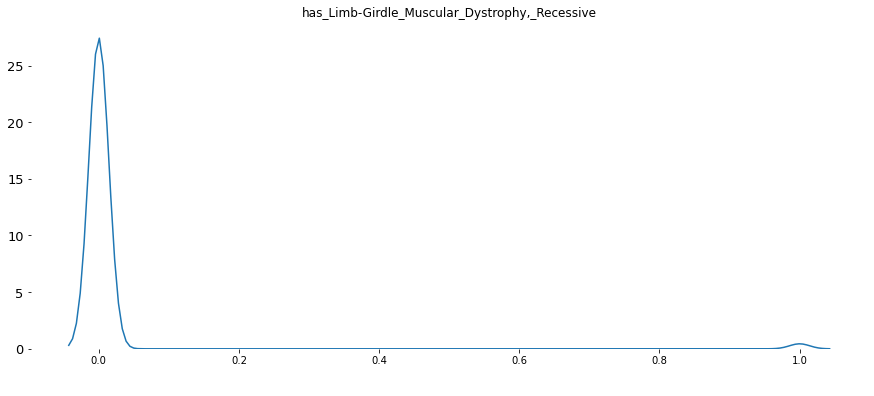

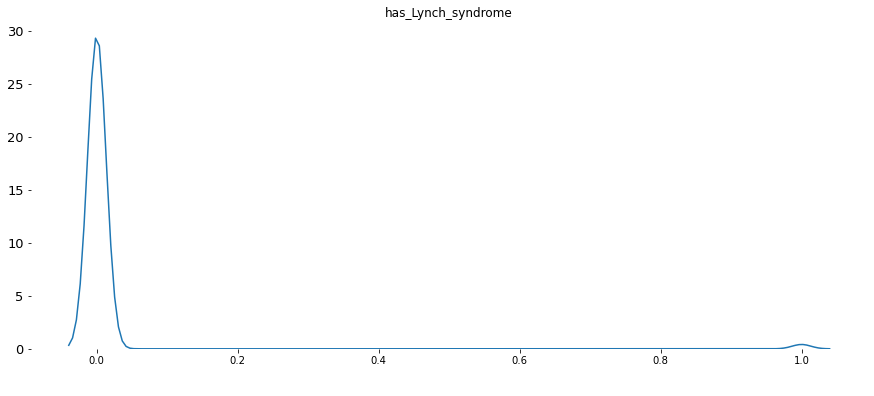

In [44]:
for column in data:
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    sns.kdeplot(data[column]).set(title=str(column))
    #sns.kdeplot(y = data[i][1:],data=data.iloc[1:], order=data[i][1:].value_counts().index, palette='Blues_r')
    #fig.text(0.1, 0.95, f'{df[i][0].split("(")[0]}', fontsize=16, fontweight='bold', fontfamily='serif')
    plt.xlabel(' ', fontsize=20)
    plt.ylabel('')
    plt.yticks(fontsize=13)
    plt.box(False)

In [52]:
#Printing the ranges of each of the columns
data.min(axis=0)
# for i in range(len(data.axes[1])):
#     data[].max(axis=0) 

CHROM                                                     1.000000
POS                                                  193245.000000
REF                                                       1.000000
ALT                                                       1.000000
AF_ESP                                                    0.000000
AF_EXAC                                                   0.000000
AF_TGP                                                    0.000000
CLNVC                                                     0.000000
CLASS                                                     0.000000
IMPACT                                                    0.000000
SYMBOL                                                    4.000000
cDNA_position                                             2.000000
CDS_position                                              1.000000
Protein_position                                          1.000000
STRAND                                                   -1.00

In [51]:
data.max(axis=0)

CHROM                                                2.300000e+01
POS                                                  2.476080e+08
REF                                                  5.000000e+00
ALT                                                  5.000000e+00
AF_ESP                                               4.990000e-01
AF_EXAC                                              4.998900e-01
AF_TGP                                               4.998000e-01
CLNVC                                                5.000000e+00
CLASS                                                1.000000e+00
IMPACT                                               3.000000e+00
SYMBOL                                               2.328000e+03
cDNA_position                                        1.060121e+11
CDS_position                                         1.057871e+11
Protein_position                                     3.185032e+09
STRAND                                               1.000000e+00
SIFT      